In [1]:
pip install -q -U "tensorflow-text==2.11.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 56.1 MB/s eta 0:00:00


In [2]:
pip install -q tf-models-official==2.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.1/630.1 KB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 KB 13.5 MB/s eta 0:00:00


In [3]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

In [4]:
import pandas as pd


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path = "/content/drive/MyDrive/Data/expanded_clean_dataset.csv"

In [7]:
data_df = pd.read_csv(path)

In [8]:
data_df.head()

,Unnamed: 0,cleaned_title,cleaned_text,target
0,0,smell hillarys fear,daniel greenfield shillman journalism fellow f...,1
1,1,watch exact moment paul ryan committed politic...,google pinterest digg linkedin reddit stumbleu...,1
2,2,kerry go paris gesture sympathy,yous secretary state john f kerry said monday ...,0
3,3,bernie supporters twitter erupt anger dnc trie...,kaydee king kaydeeking november 9 2016 lesson ...,1
4,4,battle new york primary matters,primary day new york frontrunners hillary clin...,0


In [9]:
model_df1 = data_df[['cleaned_title','cleaned_text','target']]

In [10]:
model_df1.dropna(inplace=True)

<ipython-input-10-4e7181690b80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df1.dropna(inplace=True)


In [11]:
model_df1.head()

,cleaned_title,cleaned_text,target
0,smell hillarys fear,daniel greenfield shillman journalism fellow f...,1
1,watch exact moment paul ryan committed politic...,google pinterest digg linkedin reddit stumbleu...,1
2,kerry go paris gesture sympathy,yous secretary state john f kerry said monday ...,0
3,bernie supporters twitter erupt anger dnc trie...,kaydee king kaydeeking november 9 2016 lesson ...,1
4,battle new york primary matters,primary day new york frontrunners hillary clin...,0


In [12]:
y= model_df1['target'].values
X= model_df1['cleaned_text'].values



In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

In [14]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
dense_layer = tf.keras.layers.Dense(1, activation='sigmoid', name='classifier')
preprocessor = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder_inputs = preprocessor(text_input)



In [15]:
#encoder = hub.KerasLayer(
#    "https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/2",
#    trainable=True)
#outputs = encoder(encoder_inputs)
#pooled_output = outputs["pooled_output"]      # [batch_size, 128].
#sequence_output = outputs["sequence_output"]  # [batch_size, seq_length, 128].
#classification_out = dense_layer(pooled_output)
#batch_size = 128

In [16]:
#encoder = hub.KerasLayer(
#    "https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/2",
#    trainable=True)
#outputs = encoder(encoder_inputs)
#pooled_output = outputs["pooled_output"]      # [batch_size, 256].
#sequence_output = outputs["sequence_output"]  # [batch_size, seq_length, 256].
#classification_out = dense_layer(pooled_output)
#batch_size = 256

#50/50 [==============================] - 44s 861ms/step - loss: 0.4259 - binary_accuracy: 0.7961
#Loss: 0.4258823096752167
#Accuracy: 0.7960858345031738

In [17]:
encoder = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/2",
    trainable=True)
outputs = encoder(encoder_inputs)
pooled_output = outputs["pooled_output"]      # [batch_size, 128].
classification_out = dense_layer(pooled_output)
sequence_output = outputs["sequence_output"]  # [batch_size, seq_length, 128].
batch_size = 128

#Original Dataset Results
#50/50 [==============================] - 10s 173ms/step - loss: 0.5648 - binary_accuracy: 0.7058
#Loss: 0.5648084282875061
#Accuracy: 0.7058081030845642

#Expanded Dataset Results
#396/396 [==============================] - 91s 228ms/step - loss: 0.1284 - binary_accuracy: 0.9529
#Loss: 0.12842117249965668
#Accuracy: 0.9529309272766113

In [18]:
text_classification_model = tf.keras.Model(text_input, classification_out)

In [19]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)
metrics = tf.metrics.BinaryAccuracy()

In [20]:
import numpy as np

In [21]:
epochs = 5

import math
steps_per_epoch = math.ceil(len(X_train) / batch_size)
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [22]:
text_classification_model.compile(
    optimizer = optimizer,
    loss = loss,
    metrics = metrics
)

In [23]:
history = text_classification_model.fit(X_train, y_train,validation_split=.2,epochs=epochs)

Epoch 1/5
949/949 [==============================] - 166s 159ms/step - loss: 0.2575 - binary_accuracy: 0.8823 - val_loss: 0.1288 - val_binary_accuracy: 0.9533
Epoch 2/5
949/949 [==============================] - 128s 135ms/step - loss: 0.1256 - binary_accuracy: 0.9536 - val_loss: 0.1232 - val_binary_accuracy: 0.9548
Epoch 3/5
949/949 [==============================] - 153s 161ms/step - loss: 0.1226 - binary_accuracy: 0.9539 - val_loss: 0.1232 - val_binary_accuracy: 0.9548
Epoch 4/5
949/949 [==============================] - 131s 138ms/step - loss: 0.1235 - binary_accuracy: 0.9533 - val_loss: 0.1232 - val_binary_accuracy: 0.9548
Epoch 5/5
949/949 [==============================] - 150s 158ms/step - loss: 0.1222 - binary_accuracy: 0.9540 - val_loss: 0.1232 - val_binary_accuracy: 0.9548


In [24]:
# evaluate model with keras
loss, accuracy = text_classification_model.evaluate(X_test, y_test, verbose=2)
print('Loss:', loss)
print('Accuracy:', accuracy)

396/396 - 35s - loss: 0.1252 - binary_accuracy: 0.9549 - 35s/epoch - 89ms/step
Loss: 0.12521439790725708
Accuracy: 0.9549086093902588


In [25]:
from sklearn.metrics import classification_report
test_pred = text_classification_model.predict(X_test)


396/396 [==============================] - 38s 96ms/step


In [26]:
print(classification_report(y_test, test_pred.round()))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      6190
           1       0.94      0.98      0.96      6451

    accuracy                           0.95     12641
   macro avg       0.96      0.95      0.95     12641
weighted avg       0.96      0.95      0.95     12641



dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


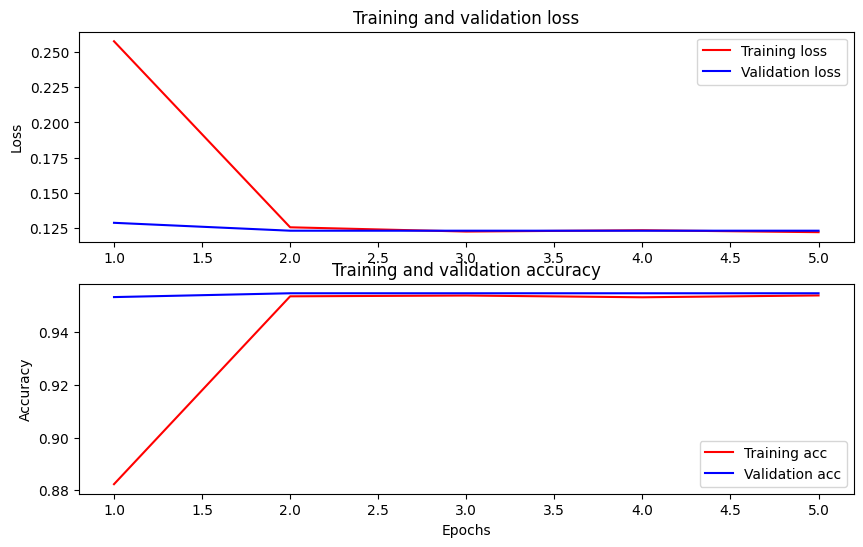

In [27]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [28]:
text_classification_model.save('/content/drive/MyDrive/Data/fake_news_model.h5')

In [29]:
reloaded_model = tf.saved_model.load('/content/drive/MyDrive/Data/fake_news_model.h5')

In [30]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, test_pred.round()))

[[5771  419]
 [ 151 6300]]


In [32]:
text_classification_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['input_1[0][0]']                
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                  